In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

from sklearn.model_selection import train_test_split

%matplotlib inline

import pandas as pd
import sklearn as skl

from sklearn.preprocessing import StandardScaler

In [7]:
url = "/content/drive/MyDrive/Colab Notebooks/Datasets/heart_disease_health_indicators.csv"
dataframe = pd.read_csv(url)

print(dataframe)
x = dataframe.iloc[:, 1:].values
y = dataframe.iloc[:, 0].values

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253656                     0       0         0          1   25       0   
253657                     0       0         1          1   24       0   
253658                     0       0         0          0   27       0   
253659                     0       0         1          1   37       0   
253660                     0       0         1          1   34       1   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0            0         0             0   

In [8]:
print(x)
print(y)

[[1 1 1 ... 9 4 3]
 [0 0 0 ... 7 6 1]
 [1 1 1 ... 9 4 8]
 ...
 [0 0 0 ... 3 6 5]
 [0 1 1 ... 6 4 1]
 [0 1 1 ... 7 4 3]]
[0 0 0 ... 0 0 0]


In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def calculate_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

In [11]:
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= alpha * gradient(theta, X, y)
        J_history.append(calculate_cost(theta, X, y))
    return theta, J_history

In [13]:
def feature_normalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [16]:
X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [17]:
alpha = 0.01
num_iters = 3000

In [18]:
theta = np.zeros(X_train_norm.shape[1])

In [19]:
theta, J_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iters)

In [20]:
predictions = sigmoid(np.dot(X_test_norm, theta))
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9089350127136183


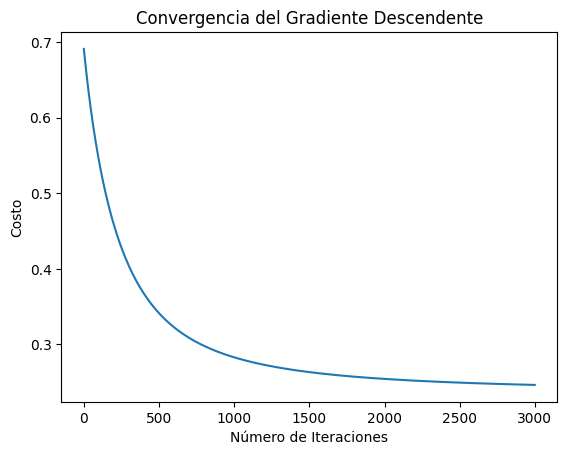

theta calculado por el descenso por el gradiente: [-2.47119541  0.21078067  0.21833586  0.04985388 -0.02926456  0.13308381
  0.18966127  0.11970637  0.00305011  0.01113839  0.0073189  -0.04962209
  0.01608445  0.02518997  0.31248407 -0.00439627  0.0611799   0.12469508
  0.2529259   0.41098363 -0.01518997 -0.07525849]


In [21]:
pyplot.plot(range(num_iters), J_history)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente')
pyplot.show()
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [22]:
print(X_test)
print(theta)

[[ 0  0  1 ...  8  5  5]
 [ 1  0  1 ...  7  4  4]
 [ 0  0  1 ...  1  4  1]
 ...
 [ 0  0  1 ...  7  4  5]
 [ 0  1  1 ... 11  6  8]
 [ 1  0  1 ... 11  4  6]]
[-2.47119541  0.21078067  0.21833586  0.04985388 -0.02926456  0.13308381
  0.18966127  0.11970637  0.00305011  0.01113839  0.0073189  -0.04962209
  0.01608445  0.02518997  0.31248407 -0.00439627  0.0611799   0.12469508
  0.2529259   0.41098363 -0.01518997 -0.07525849]


In [23]:
from sklearn.svm import SVC

classifier =  SVC()

classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.9074961070703487


En este ejercicio se uso el dataset D1, y debido a los datos binarios que poseia tal dataset se decicio usar el modelo de Clasificacion
se procesaron los datos usando pandas, tambien se los separo en 80% para entrenamiento y 20% para pruebas.
se realizaron pruebas con valores de entre 1000 y 10000 iteraciones, se decidio dejarlo en 3000 debido a que la curva de la grafica de costo no baja tan abruptamente como con 10000 iteraciones o la casi recta que dan las 1000 iteraciones

los resultados brindados con los datos de entrenamiento y 3000 iteraciones dan un 0.91 o 91% de precision, mientras que al realizar la comparacion usando los datos de prueba con el modulo SVC arroja un resultado de 0.907 o 91% de precision

se recomienda no realizar cambios en este codigo, el dataset cuenta con mas de 200000 datos lo que ocasiona que tarde 1 hora y media en hacer los calculos nuevamente